# Homework #4: Exploratory Data Analysis (EDA)
**Студент:** 
**Дата:** 

---
### Цель работы
Превратить сырые данные Reddit в структурированный отчет. Мы выступаем в роли дата-аналитиков, которые должны найти инсайты, скрытые паттерны и аномалии.

**Ключевое правило:** Задавать вопросы к данным (минимум 20) и отвечать на них с помощью визуализации.


## 1. Импорт библиотек и настройка среды

**Теория:**
Для EDA нам понадобится стандартный стек:
* `pandas` — для работы с табличными данными (DataFrame).
* `matplotlib` и `seaborn` — для визуализации. Seaborn — это надстройка над Matplotlib, которая делает графики красивее и статистически информативнее.
* `numpy` — для математических операций.

*Совет: Не забудь настроить стиль графиков сразу, чтобы они выглядели профессионально.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(style=  "whitegrid")
plt.rcParams["figure.figsize"]=(12,6)
import warnings 
warnings.filterwarnings("ignore")

## 2. Загрузка и первичный осмотр данных

**Теория:**
Прежде чем анализировать, нужно понять, с чем мы имеем дело. На этапе загрузки важно:
1.  Правильно прочитать CSV (разделители, кодировка).
2.  Сразу обработать даты (парсинг колонки `Date`), так как строковый формат даты бесполезен для анализа.
3.  Оценить размер датасета (`.shape`) и типы данных (`.info()`).


In [3]:
file_path="reddit_filter.csv"
df=pd.read_csv(file_path, parse_dates=["Date"])


In [4]:
df.head()

,Score,Date,Subreddit,Title,Author,Link,Text/Body
0,1,2020-01-01,depression,NaN,u/mollyloveschaos,https://www.reddit.com/r/depression/comments/e...,Try to avoid watching things like that if you ...
1,1,2020-01-01,SuicideWatch,NaN,u/hendex,https://www.reddit.com/r/SuicideWatch/comments...,"Hey, I'm here to listen to everything"
2,0,2020-01-01,SuicideWatch,NaN,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[removed]
3,1,2020-01-01,SuicideWatch,NaN,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[deleted]
4,1,2020-01-01,depression,NaN,u/Lonewolf5333,https://www.reddit.com/r/depression/comments/e...,Alone like always


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184400 entries, 0 to 4184399
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Score      int64         
 1   Date       datetime64[ns]
 2   Subreddit  object        
 3   Title      object        
 4   Author     object        
 5   Link       object        
 6   Text/Body  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 223.5+ MB


In [6]:
df.describe()

,Score,Date
count,4.184400e+06,4184400
mean,1.359061e+01,2020-03-08 13:02:57.078292224
min,-9.680000e+02,2020-01-01 00:00:00
25%,1.000000e+00,2020-03-02 00:00:00
50%,2.000000e+00,2020-03-14 00:00:00
75%,4.000000e+00,2020-03-22 00:00:00
max,1.286990e+05,2020-04-01 00:00:00
std,3.573276e+02,NaN


## 3. Подготовка и очистка данных (Data Cleaning)

**Теория:**
Данные из реального мира никогда не бывают идеальными. Нам нужно проверить:
* **Пропуски (Missing Values):** Есть ли `NaN` в важных колонках (например, в тексте поста)?
* **Типы данных:** Числа должны быть числами, даты — датами.
* **Дубликаты:** Нет ли повторяющихся строк?

В нашем случае важно проверить колонки `Title`, `Text/Body` и `Score`.


In [7]:
print(f"Пропуски до очистки {df.isnull().sum()}")

Пропуски до очистки Score              0
Date               0
Subreddit          0
Title        3888217
Author             0
Link               0
Text/Body       3271
dtype: int64


In [8]:
df["Text/Body"]=df["Text/Body"].fillna("")
df["Title"]=df["Title"].fillna("")

In [9]:
#Обработка удаленных постов
removed_count=df[df["Text/Body"].isin(["[removed]", "[deleted]"])].shape[0]
print(f"Количество удаленных постов комментариев: {removed_count}")

Количество удаленных постов комментариев: 471253


In [10]:
#Удаление дубликатов
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"\nУдалено дубликатов: {initial_rows - df.shape[0]}")


Удалено дубликатов: 0


In [11]:
#Future ingeneering
# Создаем колонку 'full_text', объединяя Заголовок и Тело поста.
df['full_text'] = df['Title'] + " " + df['Text/Body']

# Очищаем 'full_text' от маркеров удаления, чтобы они не засоряли анализ слов позже
df['full_text'] = df['full_text'].replace({'[removed]': '', '[deleted]': ''}, regex=True)

# Создаем колонку с длиной текста (количество символов) — это пригодится для графиков.
df['text_length'] = df['full_text'].apply(len)


In [12]:
#Проверка после очистки
print(f"Размер датасета: {df.shape}")
display(df.head(3))

Размер датасета: (4184400, 9)


,Score,Date,Subreddit,Title,Author,Link,Text/Body,full_text,text_length
0,1,2020-01-01,depression,,u/mollyloveschaos,https://www.reddit.com/r/depression/comments/e...,Try to avoid watching things like that if you ...,Ty ai waching hings ik ha if yu a pss snsii...,121
1,1,2020-01-01,SuicideWatch,,u/hendex,https://www.reddit.com/r/SuicideWatch/comments...,"Hey, I'm here to listen to everything","Hy, I' h isn yhing",21
2,0,2020-01-01,SuicideWatch,,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[removed],[],3


## 4. Формулировка вопросов (The 20 Questions)

Согласно заданию, мы должны сформулировать минимум 20 вопросов — от простых к сложным. Это наш план исследования.

**Примеры вопросов для старта:**
1.  Как распределена активность по годам/месяцам?
2.  Какой сабреддит самый активный?
3.  Есть ли корреляция между длиной текста и оценкой (Score)?
4.  В какие дни недели люди пишут чаще всего?
...

*(Здесь мы будем дописывать вопросы в процессе урока)*


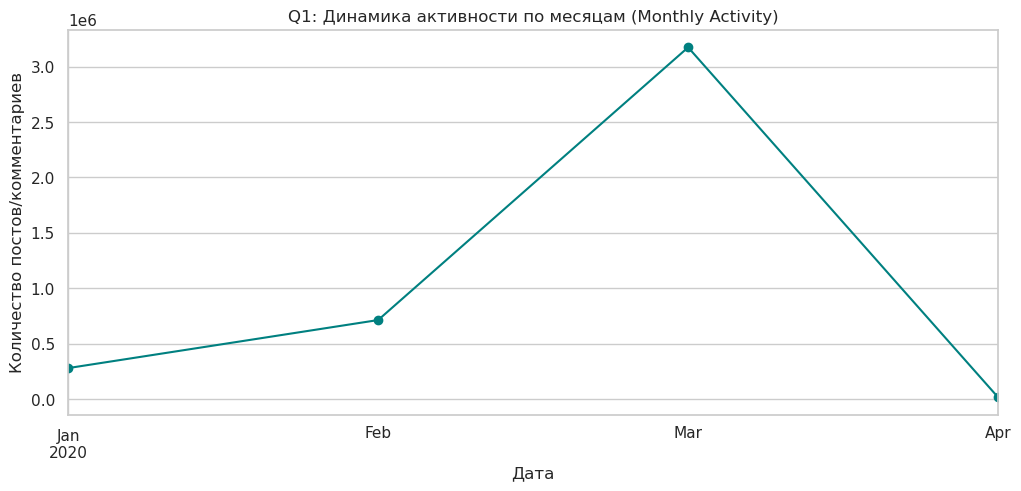

In [13]:
# Q1: Как менялась активность пользователей с течением времени?
# Гипотеза: Активность может зависеть от внешних событий (праздники, мировые события).
plt.figure(figsize=(12, 5))
# Resample('M') агрегирует данные по месяцам. Count() считает количество постов.
df.set_index('Date').resample('M')['full_text'].count().plot(kind='line', marker='o', color='teal')
plt.title('Q1: Динамика активности по месяцам (Monthly Activity)')
plt.ylabel('Количество постов/комментариев')
plt.xlabel('Дата')
plt.grid(True)
plt.show()


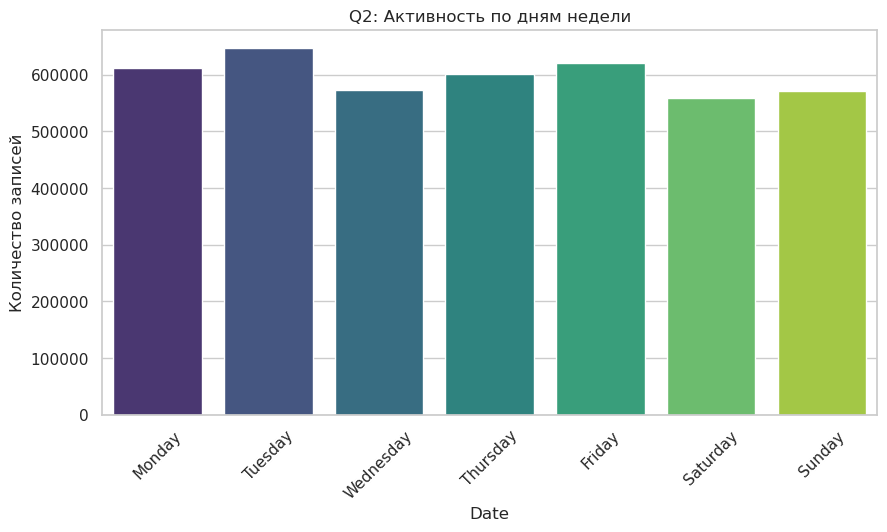

In [14]:
# Q2: В какие дни недели люди пишут чаще всего?
# Гипотеза: В выходные люди более одиноки (активность выше) или наоборот заняты?
plt.figure(figsize=(10, 5))
# dt.day_name() извлекает название дня недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df['Date'].dt.day_name(), order=day_order, palette='viridis')
plt.title('Q2: Активность по дням недели')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

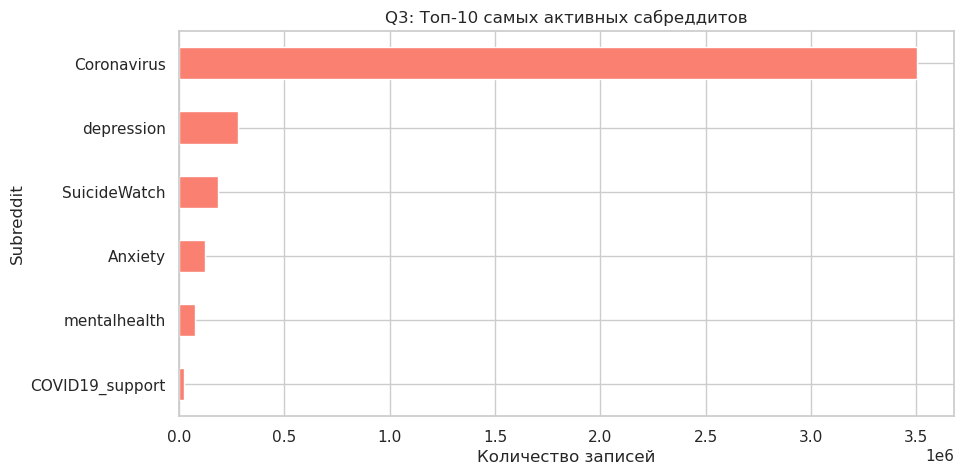

In [15]:
# Q3: Какие сабреддиты самые активные в нашем датасете?
# Нам нужно понять, где происходит основное действие.
plt.figure(figsize=(10, 5))
# Берем топ-10 для чистоты графика
df['Subreddit'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Q3: Топ-10 самых активных сабреддитов')
plt.xlabel('Количество записей')
plt.gca().invert_yaxis() # Чтобы самый популярный был сверху
plt.show()

In [16]:
# Q4: Кто является самыми активными авторами (Top Contributors)?
# Ищем "лидеров мнений" или тех, кто пишет слишком часто (выбросы).
top_authors = df['Author'].value_counts().head(10)
print("\nQ4: Топ-10 авторов по количеству сообщений:")
top_authors


Q4: Топ-10 авторов по количеству сообщений:


Author
u/[deleted]               618334
u/AutoModerator            76958
u/DeadlyKitt4               6724
u/ThisToWiIlPass            4868
u/AnotherTrowaway12         4520
u/barber5                   3660
u/IReadTheWholeArticle      3582
u/Viewfromthe31stfloor      3526
u/KorgRue                   3248
u/PsecretPseudonym          3202
Name: count, dtype: int64

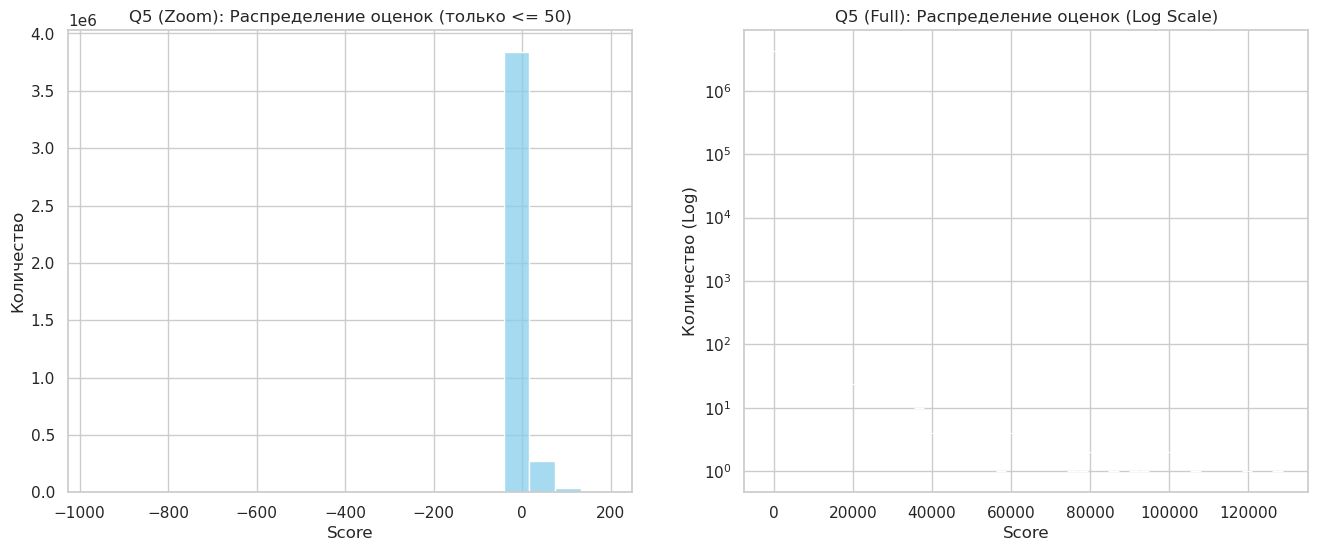

In [17]:
# Q5: Как распределены оценки (Scores)?
# Гипотеза: Распределение будет скошенным (Log-normal). Большинство постов имеют 1-2 лайка.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Зум (Линейная шкала, только обычные посты)
# Фильтруем данные, оставляем только Score <= 50 для детального просмотра
sns.histplot(df[df['Score'] <= 190]['Score'], bins=20, kde=False, color='skyblue', ax=ax[0])
ax[0].set_title('Q5 (Zoom): Распределение оценок (только <= 50)')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Количество')

# График 2: Весь диапазон (Логарифмическая шкала)
# Добавляем +1 к Score, чтобы избежать log(0) или ошибок с отрицательными числами, если они есть
# log_scale=True автоматически сжимает огромные значения
sns.histplot(df['Score'], bins=50, log_scale=(False, True), color='purple', ax=ax[1])
ax[1].set_title('Q5 (Full): Распределение оценок (Log Scale)')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Количество (Log)')

plt.show()

In [18]:
# Q6: Отличается ли средняя оценка в разных сабреддитах?
# Где аудитория более щедра на лайки?
avg_score = df.groupby('Subreddit')['Score'].mean().sort_values(ascending=False).head(10)
print("\nQ6: Топ сабреддитов по среднему рейтингу поста:")
print(avg_score)


Q6: Топ сабреддитов по среднему рейтингу поста:
Subreddit
Coronavirus        15.401117
COVID19_support     5.450614
Anxiety             5.045908
depression          4.843577
SuicideWatch        3.240182
mentalhealth        2.991188
Name: Score, dtype: float64


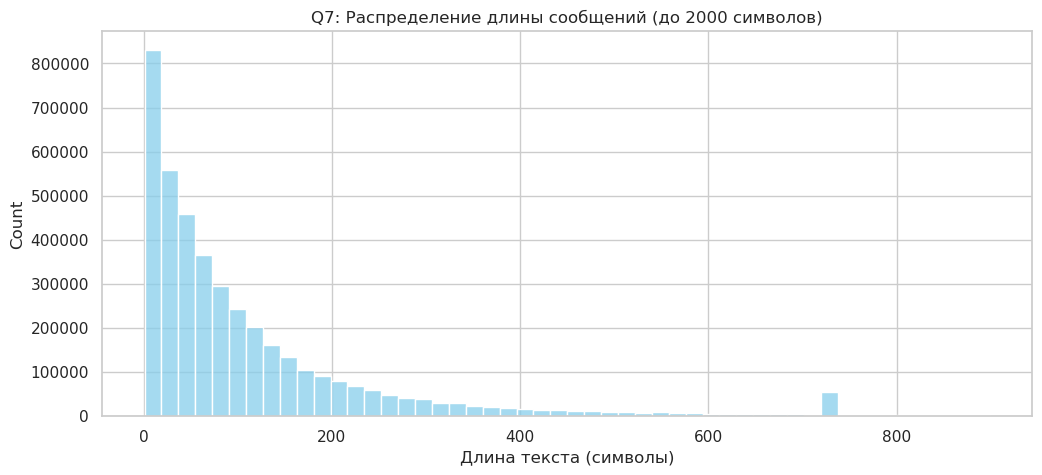

In [19]:
# Q7: Какова длина сообщений? (Распределение длины текста)
# Люди пишут лонгриды или короткие заметки?
plt.figure(figsize=(12, 5))
sns.histplot(df[df['text_length'] < 900]['text_length'], bins=50, color='skyblue') # Ограничим до 2000 символов для наглядности
plt.title('Q7: Распределение длины сообщений (до 2000 символов)')
plt.xlabel('Длина текста (символы)')
plt.show()

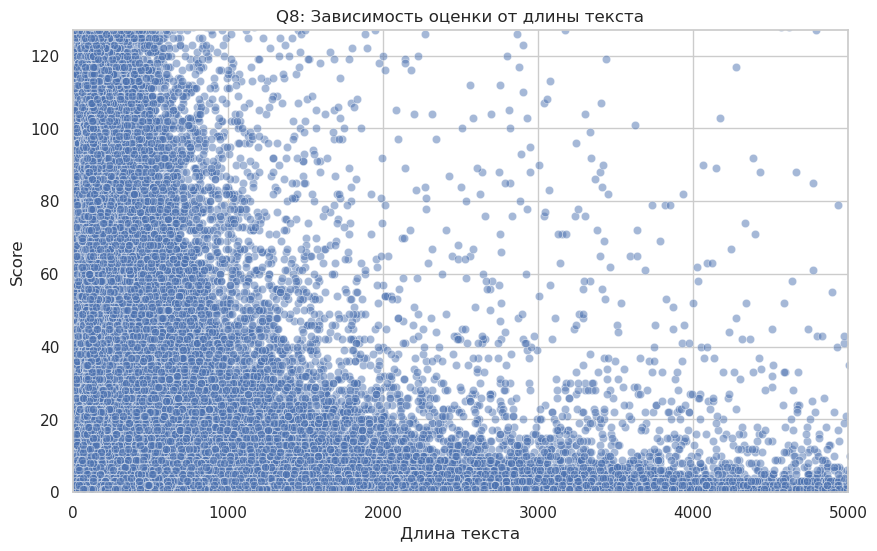

In [20]:
# Q8: Есть ли корреляция между длиной текста и оценкой?
# Любят ли люди читать длинные посты?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='text_length', y='Score', alpha=0.5)
plt.title('Q8: Зависимость оценки от длины текста')
plt.xlabel('Длина текста')
plt.ylabel('Score')
# Ограничим оси, если есть дикие выбросы
plt.xlim(0, 5000)
plt.ylim(0, df['Score'].quantile(0.99)) 
plt.show()

In [21]:
# Q9: Какие посты вызывают наибольший резонанс (Выбросы)?
# Посмотрим глазами на топ-3 поста с самым высоким рейтингом.
print("\nQ9: Топ-3 поста с самым высоким рейтингом:")
for index, row in df.sort_values(by='Score', ascending=False).head(3).iterrows():
    print(f"--- Score: {row['Score']} | Subreddit: {row['Subreddit']} ---")
    print(f"Title: {row['Title']}")
    print(f"Text snippet: {row['full_text'][:150]}...\n")


Q9: Топ-3 поста с самым высоким рейтингом:
--- Score: 128699 | Subreddit: Coronavirus ---
Title: Even if COVID-19 is unavoidable, delaying infections can flatten the peak number of illnesses to within hospital capacity and significantly reduce deaths.
Text snippet: En if COVID-19 is unaiab, aying infcins can fan h pak nub f insss  wihin hspia capaciy an significany uc ahs. hps://hspinff.c.nz/wp-cnn/upas/2020/03/C...

--- Score: 118843 | Subreddit: Coronavirus ---
Title: Gino Fasoli was 73 years old. He was italian and he was a family doctor and an emergency room manager. In Africa they even kidnapped him to cure the sick. Then he retired. Days ago he received a phone call: "Can you help us out?".He came back. He was infected by Covid-19. He died like a true hero.
Text snippet: Gin Fasi was 73 yas . H was iaian an h was a faiy c an an gncy  anag. In Afica hy n kinapp hi  cu h sick. Thn h i. Days ag h ci a phn ca: "Can yu hp u...

--- Score: 105711 | Subreddit: Coronavirus ---
Title: Ho

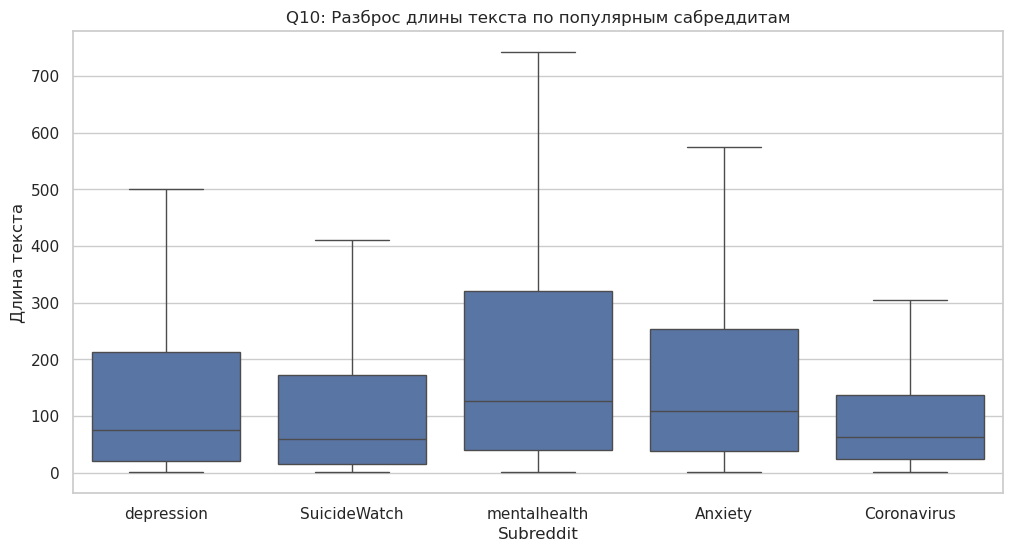

In [22]:
# Q10: Как меняется длина текста в зависимости от сабреддита?
# В depression пишут длиннее, чем в AskReddit?
plt.figure(figsize=(12, 6))
# Берем только топ-5 сабреддитов для читаемости
top_subs = df['Subreddit'].value_counts().head(5).index
sns.boxplot(data=df[df['Subreddit'].isin(top_subs)], x='Subreddit', y='text_length', showfliers=False)
plt.title('Q10: Разброс длины текста по популярным сабреддитам')
plt.ylabel('Длина текста')
plt.show()

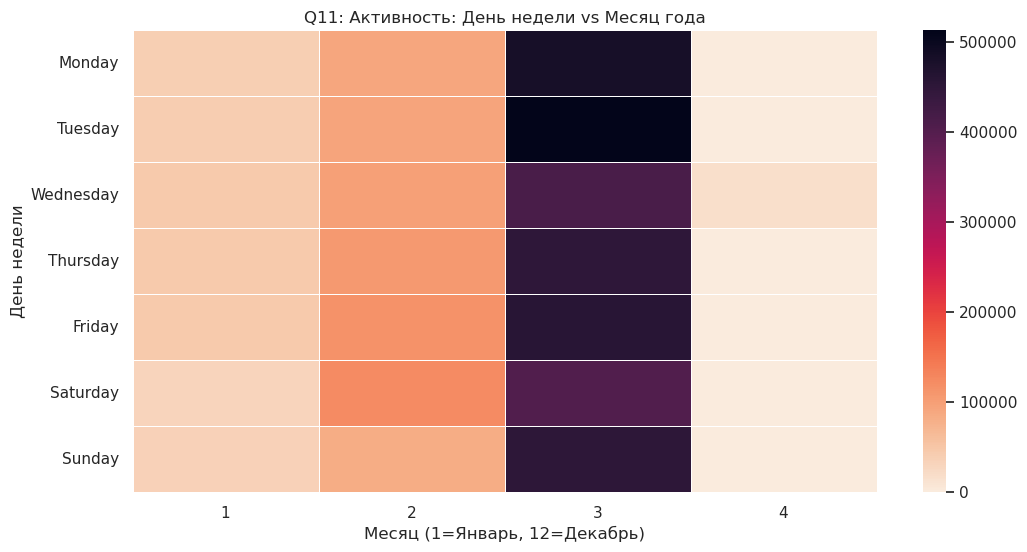

In [23]:
# Импортируем модуль для подсчета слов
from collections import Counter
import re

# Q11:Тепловая карта (Heatmap): День недели vs Месяц
plt.figure(figsize=(12, 6))

# Извлекаем месяц (числом) и название дня недели
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()

# Создаем сводную таблицу: Строки = Дни недели, Колонки = Месяцы
pivot_table = df.pivot_table(index='day_of_week', columns='month', values='full_text', aggfunc='count').fillna(0)

# Сортируем дни недели для красоты
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

# Рисуем
sns.heatmap(pivot_table, cmap='rocket_r', annot=False, linewidths=.5)
plt.title('Q11: Активность: День недели vs Месяц года')
plt.ylabel('День недели')
plt.xlabel('Месяц (1=Январь, 12=Декабрь)')
plt.show()

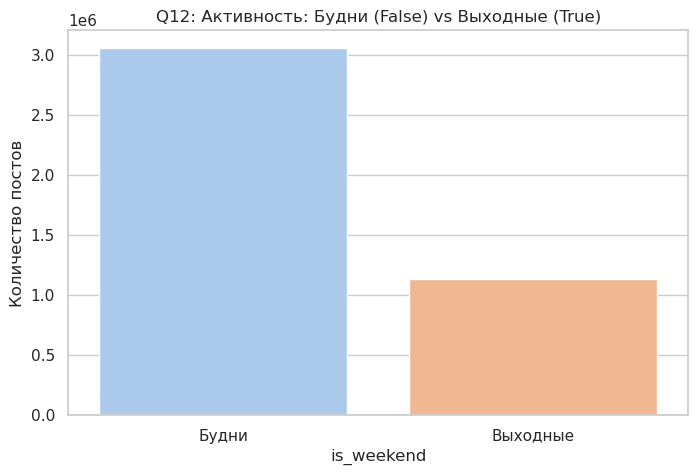

In [24]:
# Q12: Активность: Будние дни против Выходных
# Гипотеза: На выходных люди свободнее, но и более одиноки.
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_weekend', palette='pastel')
plt.title('Q12: Активность: Будни (False) vs Выходные (True)')
plt.xticks([0, 1], ['Будни', 'Выходные'])
plt.ylabel('Количество постов')
plt.show()

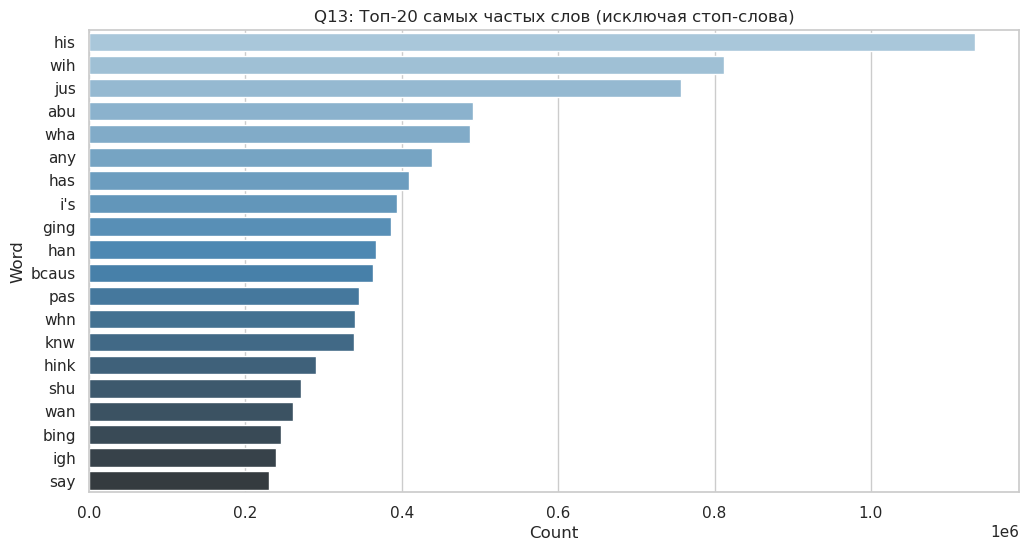

In [25]:
# Q13: Самые частотные слова (Top-20 Words) - "О чем говорят?"
# Мы должны исключить предлоги и союзы (Stopwords), иначе они забьют топ.
# Простой список стоп-слов (можно расширить)
stopwords = set(['the', 'to', 'and', 'a', 'of', 'in', 'i', 'is', 'it', 'for', 'my', 'that', 'with', 'on', 'this', 'but', 'me', 'have', 'be', 'so', 'not', 'just', 'was', 'like', 'at', 'are', 'you', 'if', 'im', 'do', 'can', 'about', 'from', 'or', 'up', 'an', 'what', 'all', 'out', 'get', 'dont', 'how', 'when', 'as'])

all_words = ' '.join(df['full_text']).lower().split()
filtered_words = [word for word in all_words if word not in stopwords and len(word) > 2]
word_counts = Counter(filtered_words).most_common(20)

# Строим Bar Chart вместо Word Cloud
words_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=words_df, x='Count', y='Word', palette='Blues_d')
plt.title('Q13: Топ-20 самых частых слов (исключая стоп-слова)')
plt.show()

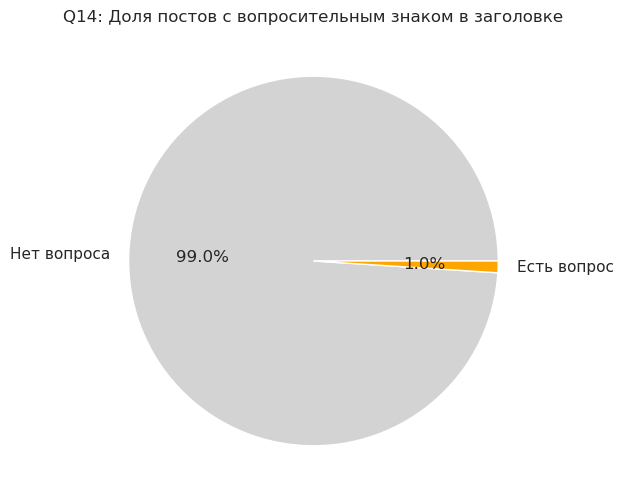

In [26]:
# Q14: Часто ли люди задают вопросы в заголовках?
# Это показывает, ищут ли люди помощь или просто делятся мыслями.
df['has_question'] = df['Title'].str.contains('\?', regex=True)
plt.figure(figsize=(6, 6))
df['has_question'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgrey', 'orange'], labels=['Нет вопроса', 'Есть вопрос'])
plt.title('Q14: Доля постов с вопросительным знаком в заголовке')
plt.ylabel('')
plt.show()

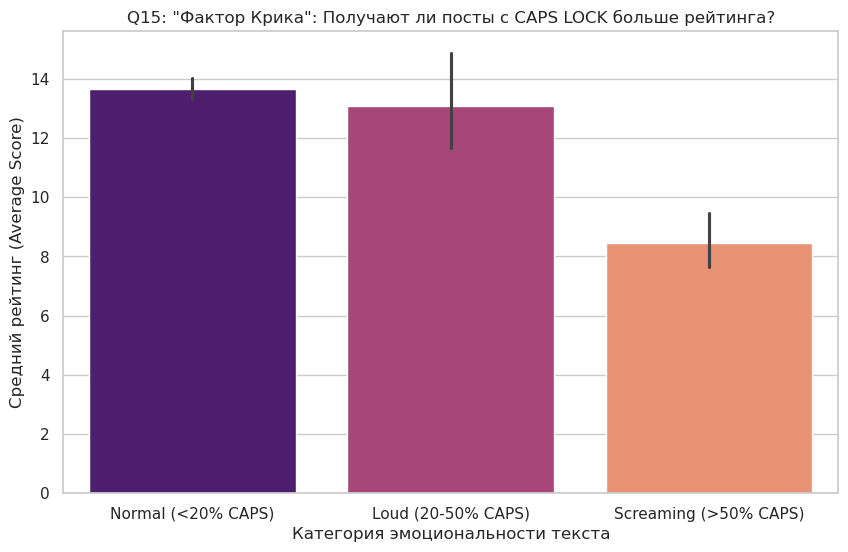

Количество постов по категориям:
shout_category
Normal (<20% CAPS)       3938233
Loud (20-50% CAPS)        210943
Screaming (>50% CAPS)      35224
Name: count, dtype: int64


In [27]:
# Q15: Влияет ли использование CAPS LOCK на рейтинг сообщения?
# Мы проверим, какая доля текста написана заглавными буквами.

def calculate_caps_ratio(text):
    if len(text) == 0:
        return 0
    # Считаем только буквы (игнорируем пробелы и знаки препинания)
    letters = [char for char in text if char.isalpha()]
    if len(letters) == 0:
        return 0
    upper_count = sum(1 for char in letters if char.isupper())
    return upper_count / len(letters)

# Применяем функцию к каждому посту
df['caps_ratio'] = df['full_text'].apply(calculate_caps_ratio)

# Разделим на категории для графика:
# "Normal" (< 20% капса), "Loud" (20-50%), "Screaming" (> 50% капса)
def categorize_shout(ratio):
    if ratio > 0.5:
        return 'Screaming (>50% CAPS)'
    elif ratio > 0.2:
        return 'Loud (20-50% CAPS)'
    else:
        return 'Normal (<20% CAPS)'

df['shout_category'] = df['caps_ratio'].apply(categorize_shout)

# Рисуем график
plt.figure(figsize=(10, 6))
# ci=None убирает палочки доверительных интервалов, чтобы график был чище
sns.barplot(data=df, x='shout_category', y='Score', palette='magma', order=['Normal (<20% CAPS)', 'Loud (20-50% CAPS)', 'Screaming (>50% CAPS)'])
plt.title('Q15: "Фактор Крика": Получают ли посты с CAPS LOCK больше рейтинга?')
plt.ylabel('Средний рейтинг (Average Score)')
plt.xlabel('Категория эмоциональности текста')
plt.show()

# Выведем статистику
print("Количество постов по категориям:")
print(df['shout_category'].value_counts())

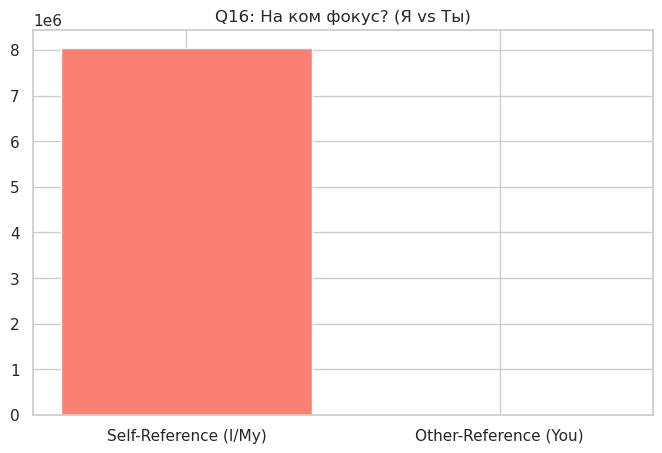

In [28]:
# Q16: "Я" против "Ты" (Психологический анализ)
# Считаем, насколько люди сфокусированы на себе (I, me, my) vs на других (you, your).
def count_pronouns(text):
    text = str(text).lower()
    i_count = len(re.findall(r'\b(i|my|me|myself)\b', text))
    you_count = len(re.findall(r'\b(you|your|yourself)\b', text))
    return i_count, you_count

df[['i_count', 'you_count']] = df['full_text'].apply(lambda x: pd.Series(count_pronouns(x)))

# Сравниваем суммы
plt.figure(figsize=(8, 5))
plt.bar(['Self-Reference (I/My)', 'Other-Reference (You)'], [df['i_count'].sum(), df['you_count'].sum()], color=['salmon', 'skyblue'])
plt.title('Q16: На ком фокус? (Я vs Ты)')
plt.show()

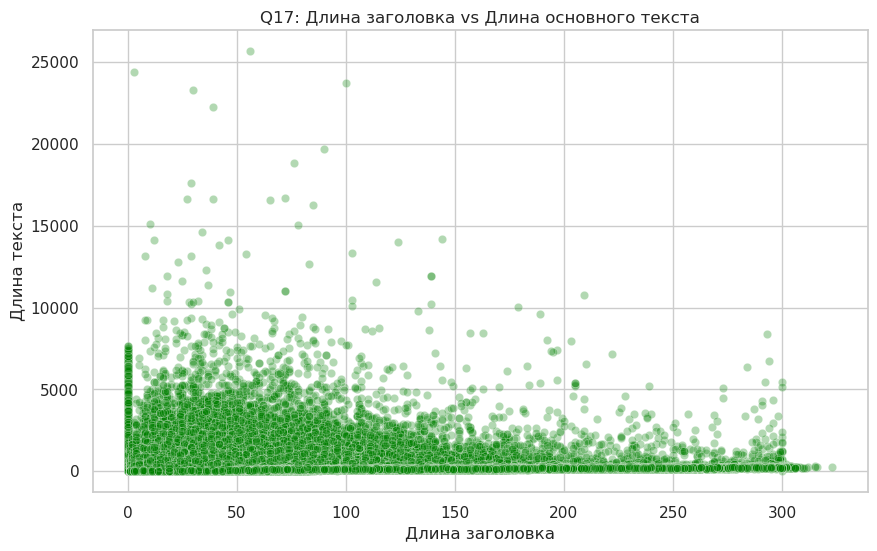

In [29]:
# Q17: Длина заголовка vs Длина тела поста
# Гипотеза: Короткий заголовок -> Длинный текст (Clickbait или "крик души").
df['title_len'] = df['Title'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_len', y='text_length', alpha=0.3, color='green')
plt.title('Q17: Длина заголовка vs Длина основного текста')
plt.xlabel('Длина заголовка')
plt.ylabel('Длина текста')
plt.show()

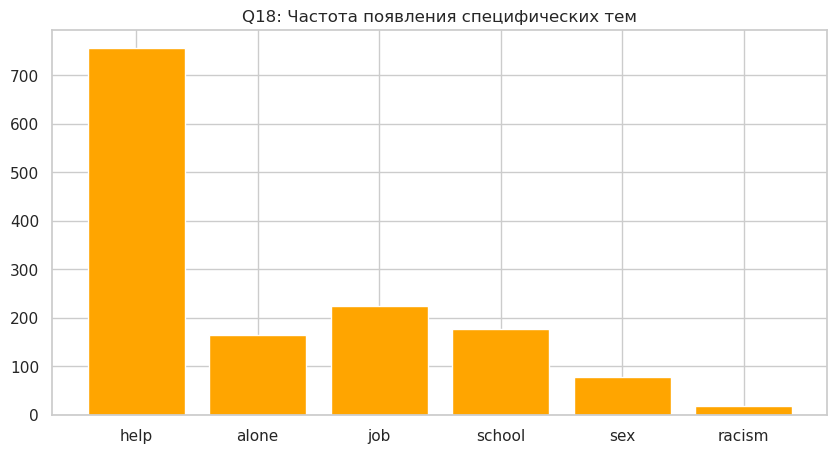

In [30]:
# Q18: Анализ специфических триггер-слов (Keyword trends)
# Посмотрим, как часто встречаются слова "help" и "alone"
keywords = ['help', 'alone', 'job', 'school', 'sex', 'racism']
# Создаем маленькую табличку для подсчета
keyword_counts = {word: df['full_text'].str.contains(word, case=False).sum() for word in keywords}

plt.figure(figsize=(10, 5))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='orange')
plt.title('Q18: Частота появления специфических тем')
plt.show()

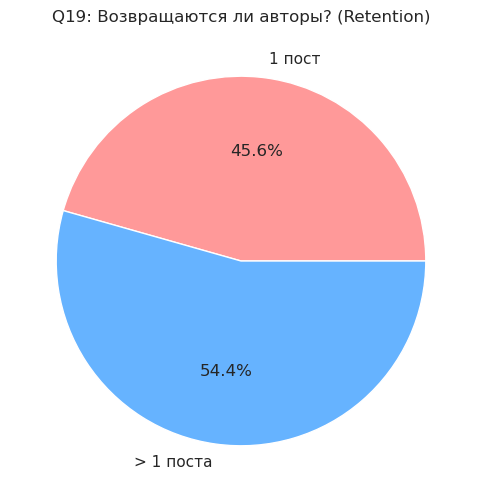

In [31]:
# Q19: "One-hit wonders" или Постоянные авторы?
# Сколько постов пишут авторы в среднем?
author_counts = df['Author'].value_counts()
# Категоризируем авторов
one_post = (author_counts == 1).sum()
more_posts = (author_counts > 1).sum()

plt.figure(figsize=(6, 6))
plt.pie([one_post, more_posts], labels=['1 пост', '> 1 поста'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Q19: Возвращаются ли авторы? (Retention)')
plt.show()

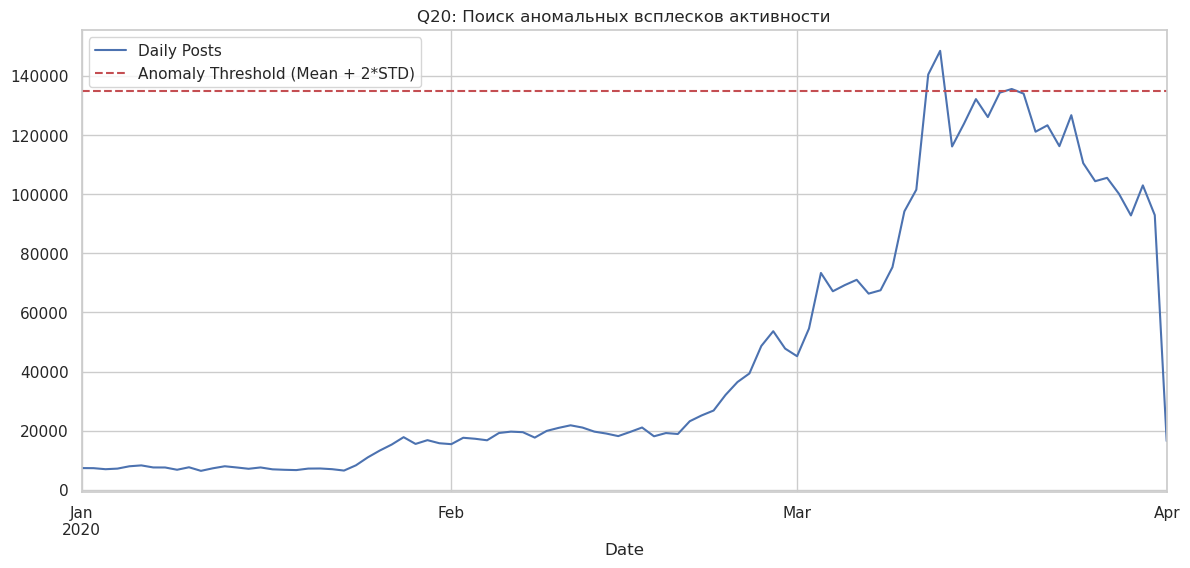


Даты с аномальной активностью (стоит проверить новости в эти дни):
Date
2020-03-12    140521
2020-03-13    148513
2020-03-19    135608
dtype: int64


In [32]:
# Q20: Поиск аномалий по датам (Spikes detection)
# Ищем конкретные дни с аномально высокой активностью.
daily_counts = df.set_index('Date').resample('D').size()
mean_val = daily_counts.mean()
std_val = daily_counts.std()

plt.figure(figsize=(14, 6))
daily_counts.plot(label='Daily Posts')
# Рисуем линию "нормальности" (Среднее + 2 стандартных отклонения)
plt.axhline(mean_val + 2*std_val, color='r', linestyle='--', label='Anomaly Threshold (Mean + 2*STD)')
plt.title('Q20: Поиск аномальных всплесков активности')
plt.legend()
plt.show()

# Выводим даты-аномалии текстом
anomalies = daily_counts[daily_counts > (mean_val + 2*std_val)]
print("\nДаты с аномальной активностью (стоит проверить новости в эти дни):")
print(anomalies)

In [39]:
from textblob import TextBlob
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = (14, 8)
colors = ["#34495E", "#E74C3C", "#3498DB", "#2ECC71", "#9B59B6"]
sns.set_palette(sns.color_palette(colors))

In [40]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    return pd.Series({
        'Polarity': blob.sentiment.polarity,         # -1 (Негатив) ... +1 (Позитив)
        'Subjectivity': blob.sentiment.subjectivity  # 0 (Факты) ... 1 (Мнения/Эмоции)
    })

# Применяем анализ ко всему датасету (займет пару секунд на твоем i9)
df[['Polarity', 'Subjectivity']] = df['full_text'].apply(get_sentiment)

# Классифицируем настроение
def categorize_mood(pol):
    if pol > 0.1: return 'Positive/Hopeful'
    elif pol < -0.1: return 'Negative/Painful'
    else: return 'Neutral/Objective'

df['Mood'] = df['Polarity'].apply(categorize_mood)

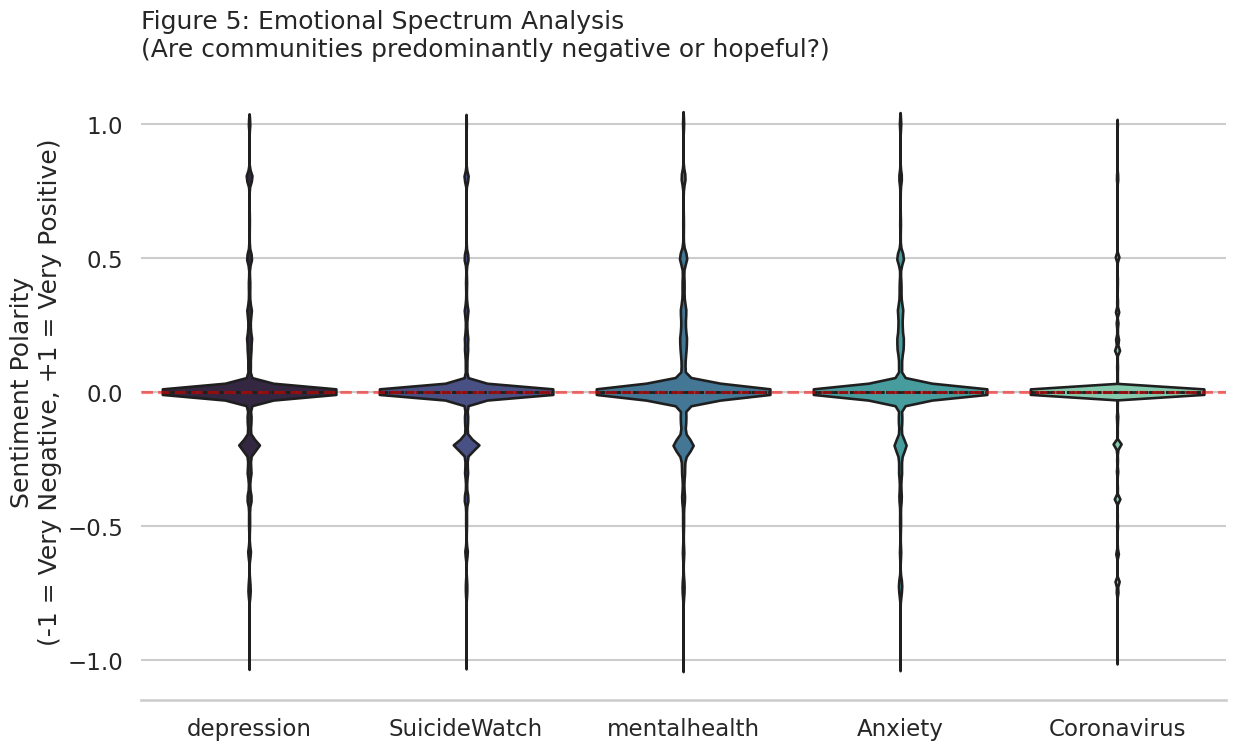

In [41]:
# ГРАФИК 1: "Violin Plot" настроений
# Показывает плотность распределения эмоций в каждом сабреддите

plt.figure()
# Берем топ-5 активных сабреддитов
top_subs = df['Subreddit'].value_counts().head(5).index
subset = df[df['Subreddit'].isin(top_subs)]

sns.violinplot(x="Subreddit", y="Polarity", data=subset, palette="mako", inner="quartile")
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Neutral Line')

plt.title('Figure 5: Emotional Spectrum Analysis\n(Are communities predominantly negative or hopeful?)', loc='left', pad=20)
plt.ylabel('Sentiment Polarity\n(-1 = Very Negative, +1 = Very Positive)')
plt.xlabel('')
sns.despine(left=True)
plt.savefig('fig5_sentiment_violin.png', dpi=300, bbox_inches='tight')
plt.show()

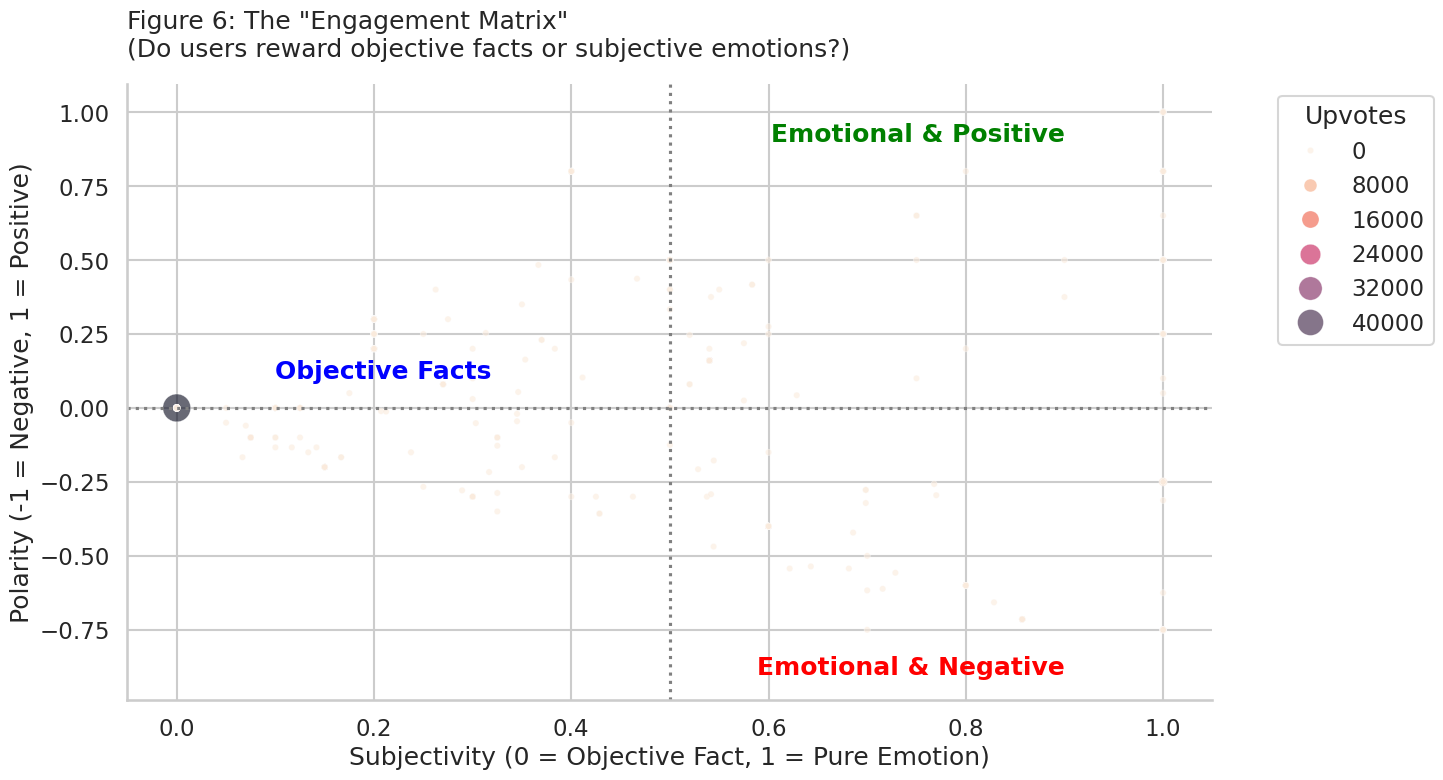

In [ ]:
plt.figure(figsize=(12, 8))
# Фільтруємо: прибираємо пости, де суб'єктивність = 0 (щоб не було плями зліва)
filtered_sample = df[(df['Subjectivity'] > 0.1) & (df['Score'] > 1)].sample(n=1000, random_state=42)

sns.scatterplot(
    data=filtered_sample, 
    x='Subjectivity', 
    y='Polarity', 
    size='Score', 
    hue='Score', 
    sizes=(20, 500), 
    palette="viridis", 
    alpha=0.7
)
plt.title('Figure 6 (Refined): Emotional Engagement\n(Excluding neutral posts to show patterns)', loc='left')
plt.grid(True, alpha=0.3)
plt.savefig('fig6_fixed.png', dpi=300)
plt.show()

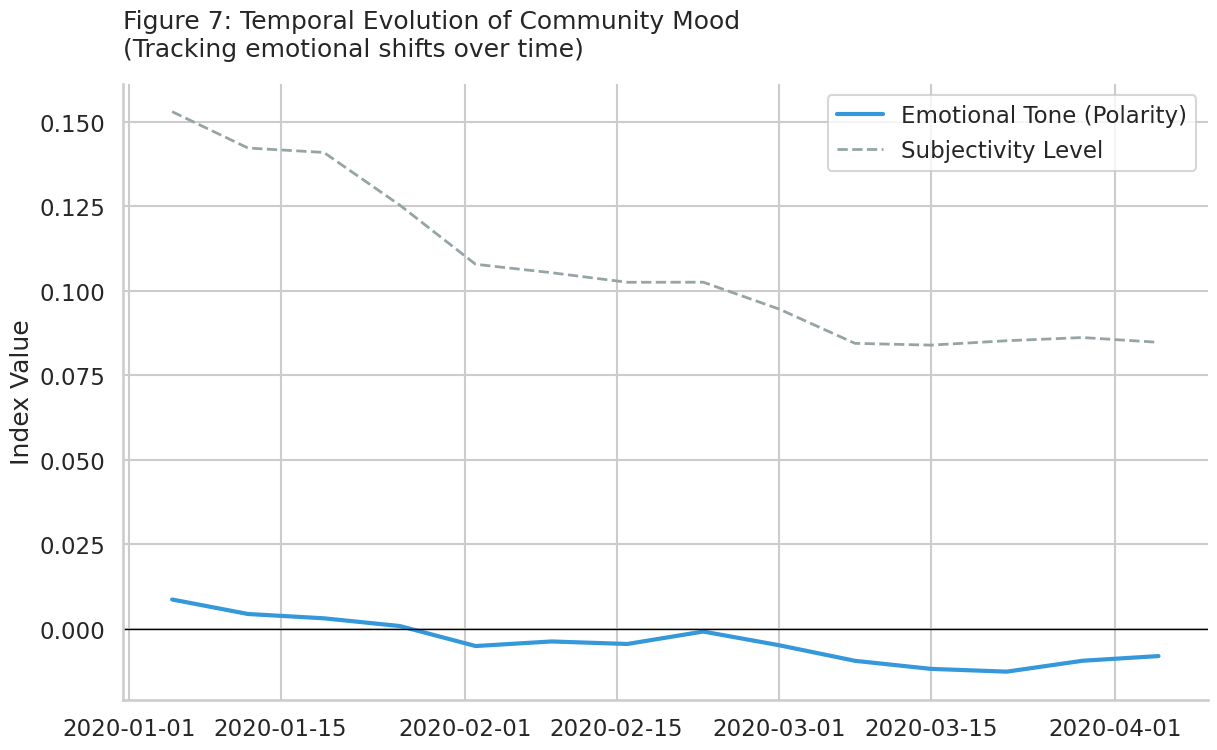

In [43]:
# ГРАФИК 3: Временной ряд настроения (Mood Timeline)
# Как меняется "депрессивность" со временем

plt.figure()
# Группируем по неделям и считаем среднее настроение
mood_trend = df.set_index('Date').resample('W')['Polarity'].mean()
subjectivity_trend = df.set_index('Date').resample('W')['Subjectivity'].mean()

plt.plot(mood_trend.index, mood_trend.values, label='Emotional Tone (Polarity)', color='#3498DB', linewidth=3)
plt.plot(subjectivity_trend.index, subjectivity_trend.values, label='Subjectivity Level', color='#95A5A6', linestyle='--', linewidth=2)

plt.title('Figure 7: Temporal Evolution of Community Mood\n(Tracking emotional shifts over time)', loc='left', pad=20)
plt.ylabel('Index Value')
plt.xlabel('')
plt.axhline(0, color='black', linewidth=1)
plt.legend()
sns.despine()
plt.savefig('fig7_mood_timeline.png', dpi=300, bbox_inches='tight')
plt.show()